# EWMA: Exponential Weighted Moving Average


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [2]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

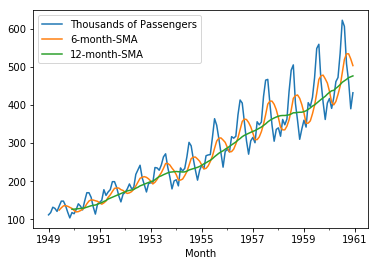

In [3]:
airline.plot();

<b>EWMA is better than basic SMA since: </b>
<br> <ol> SMA's smaller windows leads to greater noise </ol>
<ol> SMA can never reach full peak or actual value </ol>
<ol> SMA can not inform about the possible future, but just describes trends </ol>
<ol> SMA can highly be skewed </ol>

<br> <b> In contrast, EWMA pays more weight, i.e. significance to the recent values </b>

The formula for <b>EWMA</b> is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

### In EWMA α refers to smoothing factor
\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}


* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [4]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

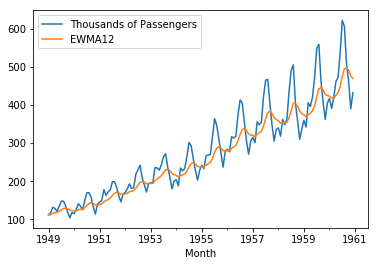

In [5]:
airline[['Thousands of Passengers','EWMA12']].plot();

## Comparing SMA to EWMA

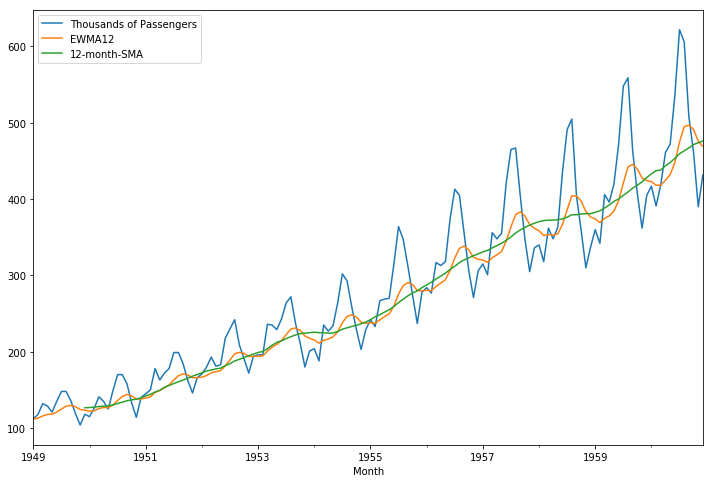

In [6]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Simple Exponential Smoothing
The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. Use of <em>Double</em> and <em>Triple Exponential Smoothing</em> with the Holt-Winters Methods could be more beneficial.